# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM DS raw dataset

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/fbm_ds_cite_seq/data/fbm_ds_citeseq_plus_scrna_forMS_20210119.h5ad")

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.raw = adata

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                 181
CD14 monocyte              320
CD56 bright NK              79
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   39
mast cell                   27
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                 

In [8]:
adata.obs

,__is_in_cluster__,age,auto_prd,batch,cell.labels,cell.labels_20200713,is_doublet,lanes,leiden,lr_pred,mad_prd,nGene,nUMI,n_genes,orig.ident,percent.mito,sequencing.type,sex,souporcell_assignment,souporcell_doublet
AAACCTGAGTACGTTC-1-DSOX4,nan,13PCW,False,0,early erythroid,early erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.048956,5GEX,nan,nan,nan
AAACCTGCAAGCGATG-1-DSOX4,nan,13PCW,False,0,late erythroid,late erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.023771,5GEX,nan,nan,nan
AAACGGGCACCGAAAG-1-DSOX4,nan,13PCW,False,0,promonocyte,monocyte precursor,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.058779,5GEX,nan,nan,nan
AAACGGGGTTATGCGT-1-DSOX4,nan,13PCW,False,0,late erythroid,late erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.011670,5GEX,nan,nan,nan
AAAGATGGTAGCACGA-1-DSOX4,nan,13PCW,False,0,pre B cell,pre B cell,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.044516,5GEX,nan,nan,nan
AAAGATGGTAGCCTCG-1-DSOX4,nan,13PCW,False,0,late erythroid,late erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.007720,5GEX,nan,nan,nan
AAAGATGGTGTCAATC-1-DSOX4,nan,13PCW,False,0,osteoblast,osteoblast,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.169611,5GEX,nan,nan,nan
AAAGATGTCTTATCTG-1-DSOX4,nan,13PCW,False,0,early erythroid,early erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.036711,5GEX,nan,nan,nan
AAAGATGTCTTGGGTA-1-DSOX4,nan,13PCW,False,0,early erythroid,early erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.053061,5GEX,nan,nan,nan
AAAGCAAAGCCGGTAA-1-DSOX4,nan,13PCW,False,0,early erythroid,early erythroid,nan,DSOX4,nan,nan,False,NaN,NaN,NaN,D1,0.053626,5GEX,nan,nan,nan


In [9]:
adata.obs["orig.ident"] = adata.obs["orig.ident"].replace(["ICH12740", "ICH12813", "ICH12941", "ICH14486"],
                                                          ["D1", "D2", "D3", "D4"])
cell_numbers = adata.obs.groupby(["orig.ident"]).apply(len)
cell_numbers

orig.ident
D1                           1613
D1_D2_D3_pool_sample_1        388
D1_D2_D3_pool_sample_2       1788
D1_D2_D3_pool_sample_3        439
D1_D2_D3_pool_unassigned      179
D2                           1643
D3                            496
D4                          10197
dtype: int64

# Add QC

In [10]:
# add the total counts per cell as observations-annotation to adata
adata.obs['nUMI'] = adata.X.sum(axis=1)
sc.pp.calculate_qc_metrics(adata, var_type='genes', layer=None, use_raw=False, inplace=True, parallel=None)
adata.obs["nGene"] = adata.obs["n_genes_by_counts"]

del adata.obs["n_genes_by_counts"]
del adata.obs["log1p_n_genes_by_counts"]
del adata.obs["log1p_total_counts"]
del adata.obs["total_counts"]
del adata.obs["pct_counts_in_top_50_genes"]
del adata.obs["pct_counts_in_top_100_genes"]
del adata.obs["pct_counts_in_top_200_genes"]
del adata.obs["pct_counts_in_top_500_genes"]
del adata.var["n_cells_by_counts"]
del adata.var["mean_counts"]
del adata.var["log1p_mean_counts"]
del adata.var["pct_dropout_by_counts"]
del adata.var["total_counts"]
del adata.var["log1p_total_counts"]

In [11]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent.mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

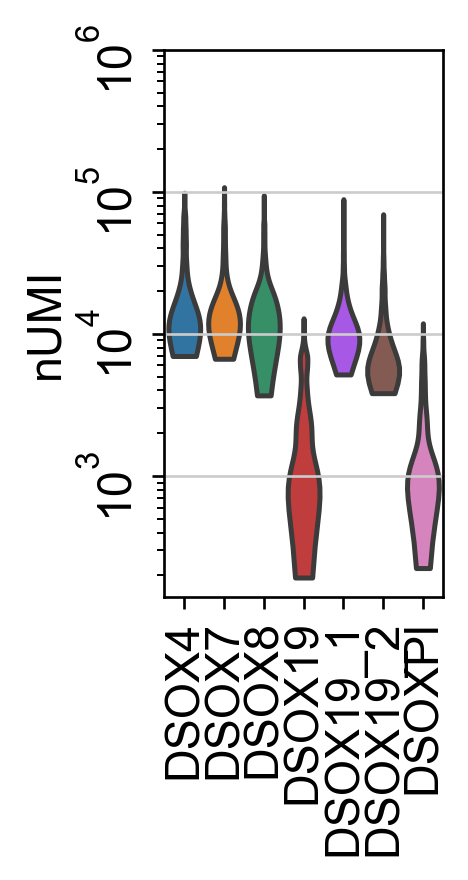

In [12]:
plt.rcParams["figure.figsize"] = (2.5,3)
 
ax=sc.pl.violin(adata, 'nUMI', groupby='lanes', log=True, cut=0, stripplot=False, rotation=90, 
           show=False) 

ax.set_ylim(0, 1000000)

plt.savefig("figures/FBM_downs_numi_violin_20210127.pdf")

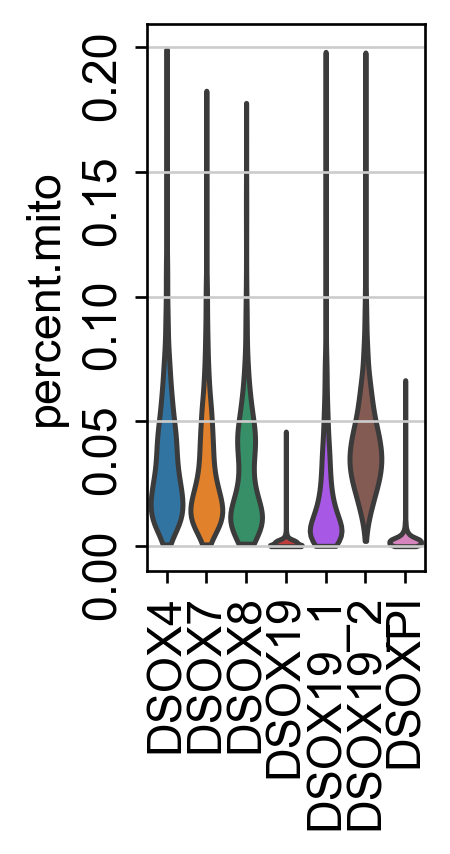

In [13]:
# Quality control - plot QC metrics

plt.rcParams["figure.figsize"] = (2.5,3)
 
ax=sc.pl.violin(adata, 'percent.mito', groupby='lanes', log=False,  stripplot=False, rotation=90, cut=0,
                        save="FBM_down_pmito_violin_20210127.pdf", show=True)

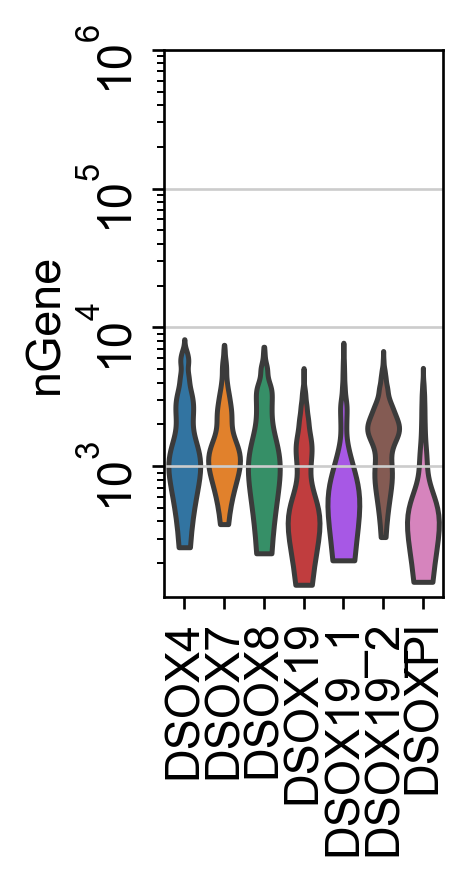

In [14]:
plt.rcParams["figure.figsize"] = (2.5,3)
 
ax=sc.pl.violin(adata, 'nGene', groupby='lanes', log=True, cut=0, stripplot=False, rotation=90, 
           show=False) 

ax.set_ylim(0, 1000000)

plt.savefig("figures/FBM_downs_ngene_violin_20210208.pdf")